# Introduction

The National UFO Reporting Center (NUFORC) has been in operation since 1974. In their own words, "The Center’s primary function over the past five decades has been to receive, record, and to the greatest degree possible, corroborate and document reports from individuals who have been witness to unusual, possibly UFO-related events". They make no claims as to the validity of the information in any of these reports.  They have omitted any of the obvious hoaxes, however most reports have been posted exactly as received in the author’s own words. Their full database contains over 147,000 entries, but we chose a more concise version.

For our project we chose a dataset of recorded UFO sightings. We found this dataset at https://corgis-edu.github.io/corgis/python/ufo_sightings/. However, the data for the set comes from the  (https://nuforc.org/). The data was taken from the the NUFORC, was cleaned and uploaded to GitHub by Sigmonf Axel. The dataset contains over 80,000 entries from around the world.

We chose this dataset because we are intrigued by UFOs and how we can interact with them. We had questions such as Where are we most likely to see a UFO? Where are we most likely to see a _____ shaped UFO? Where are we most likely to have our longest encounter? What if we want our encounter to be at a certain time of day? If we go to a certain place, what is the most likely shape of a UFO? 

# Materials

Our dataset consists of 11 columns, and 80,332 entries. The attriubtes are: date_time, city_area, state, country, ufo_shape, encounter_length, described_encounter_length, description, date_documented, latitude, and longitude. Most of these are self explanatory, but some could use fome further explanation. 

- "date_time" is the day, month, year, and time of day that the encounter happened, but "date_documented" is the date that the encounter was reproted to the NUFORC. The difference between these ranges from 0 days to many years. 
    
- "described_encounter_length" is the length of the encounter as reported by the party reporting it. Often this contains text, such as "30 seconds", or "1-2 hours". "encounter_length" takes the value from the described encounter length and converts it to seconds. In cases where a time range is given, the ceiling of that range is taken for the encounter_length".

Our data was already very clean when we started. Many of the "important" attributes have very few missing values. Importance is relative in this case. While there are lots of missing values in the "country" column, there is only 1 missing value in the "latitude" and "longitude" columns. Since latitude and longitude can be used to find the exact location of the encounter, they are more important than the "city_area", "state", and "country" attributes which means we can worry less about those missing values.

# Methods

<font size=4><b>Algorithms</b></font>

The first algorithm that we ran was DBSCAN. We wanted to group the encounters based off of their location (latitude and longitude). DBSCAN is a density-based clustering algorithm designed to identify clusters of high-density points in a dataset. It forms clusters based on the density of data points in the feature space. DBSCAN defines clusters as regions with a sufficient number of neighboring data points. It identifies core points, which have a specified minimum number of neighbors within a specified radius (epsilon, ε), and expands clusters by connecting core points. We chose to use DBSCAN becuase we didn't know the number of clusters to expect, and we had no idea what kind of shape those clusters would be in. These two factors make DBSCAN the ideal clustering algorithm for our dataset.


We also tried to make a classifier model for the dataset. The goal was the be able to guess the shape of a UFO based off of its latitude and longitude. We used a DecisionTreeClassifier from sklearn. The decision tree is a tree-like model where each node represents a decision based on the input features. It splits the dataset into subsets based on the most significant attribute at each node, creating a tree structure until a stopping condition is met. We chose the decision tree for a number of reasons. They are easy to understand and interpret, can capture non-linear relationships in the data, and they can naturally handle categorical features without the need for one-hot encoding which is useful as our ufo_shape attribute is categorical. 

<font size=4><b>Visualizations</b></font>

To help with find and understand any trends in the data, we incorported the following visualizations: 
- A chart showing the number of reported encounters by year
- A scatterplot showing the location of every reported encounter
- A bar plot showing the distribution of reported UFO shape
- A scatterplot showing the shape and location of each reported enoucnter 
- A scatterplot showing the location of every reported encounter in the United States
- A heatmap showing the number of reported encounters in each location of the United States
- A bar plot showing the number of encounters reported by month
- A heatmap showing the distribution of encounters by time of day and day of week
- A bar plot showing the average encounter length for every UFO shape

# Results

In [1]:
import pandas as pd
ufos = pd.read_csv("ufo_sightings.csv");

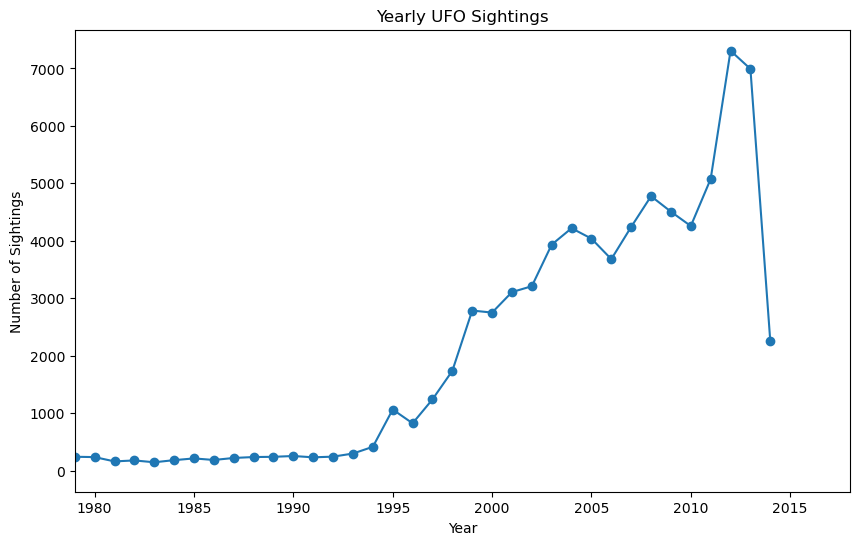

In [2]:
# Show distribution of encounters by year
import matplotlib.pyplot as plt
ufos['date_time'] = pd.to_datetime(ufos['date_time'], errors='coerce')

# Drop rows with invalid datetime values
ufos = ufos.dropna(subset=['date_time'])

# Create column in dataframe for year of encounter
ufos['year'] = ufos['date_time'].dt.year
yearly_counts = ufos.groupby('year').size()

# Plot figure
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Sightings', title='Yearly UFO Sightings')
plt.xlim(1979, 2018) # Set the x-axis limits

plt.show()

<font size=3><b>Figure 1</b></font>

Here we see a clear increasing of sightings as time progresses in the 2000's, the dip at the end can be ignored as that just represents the end of recording for this dataset.

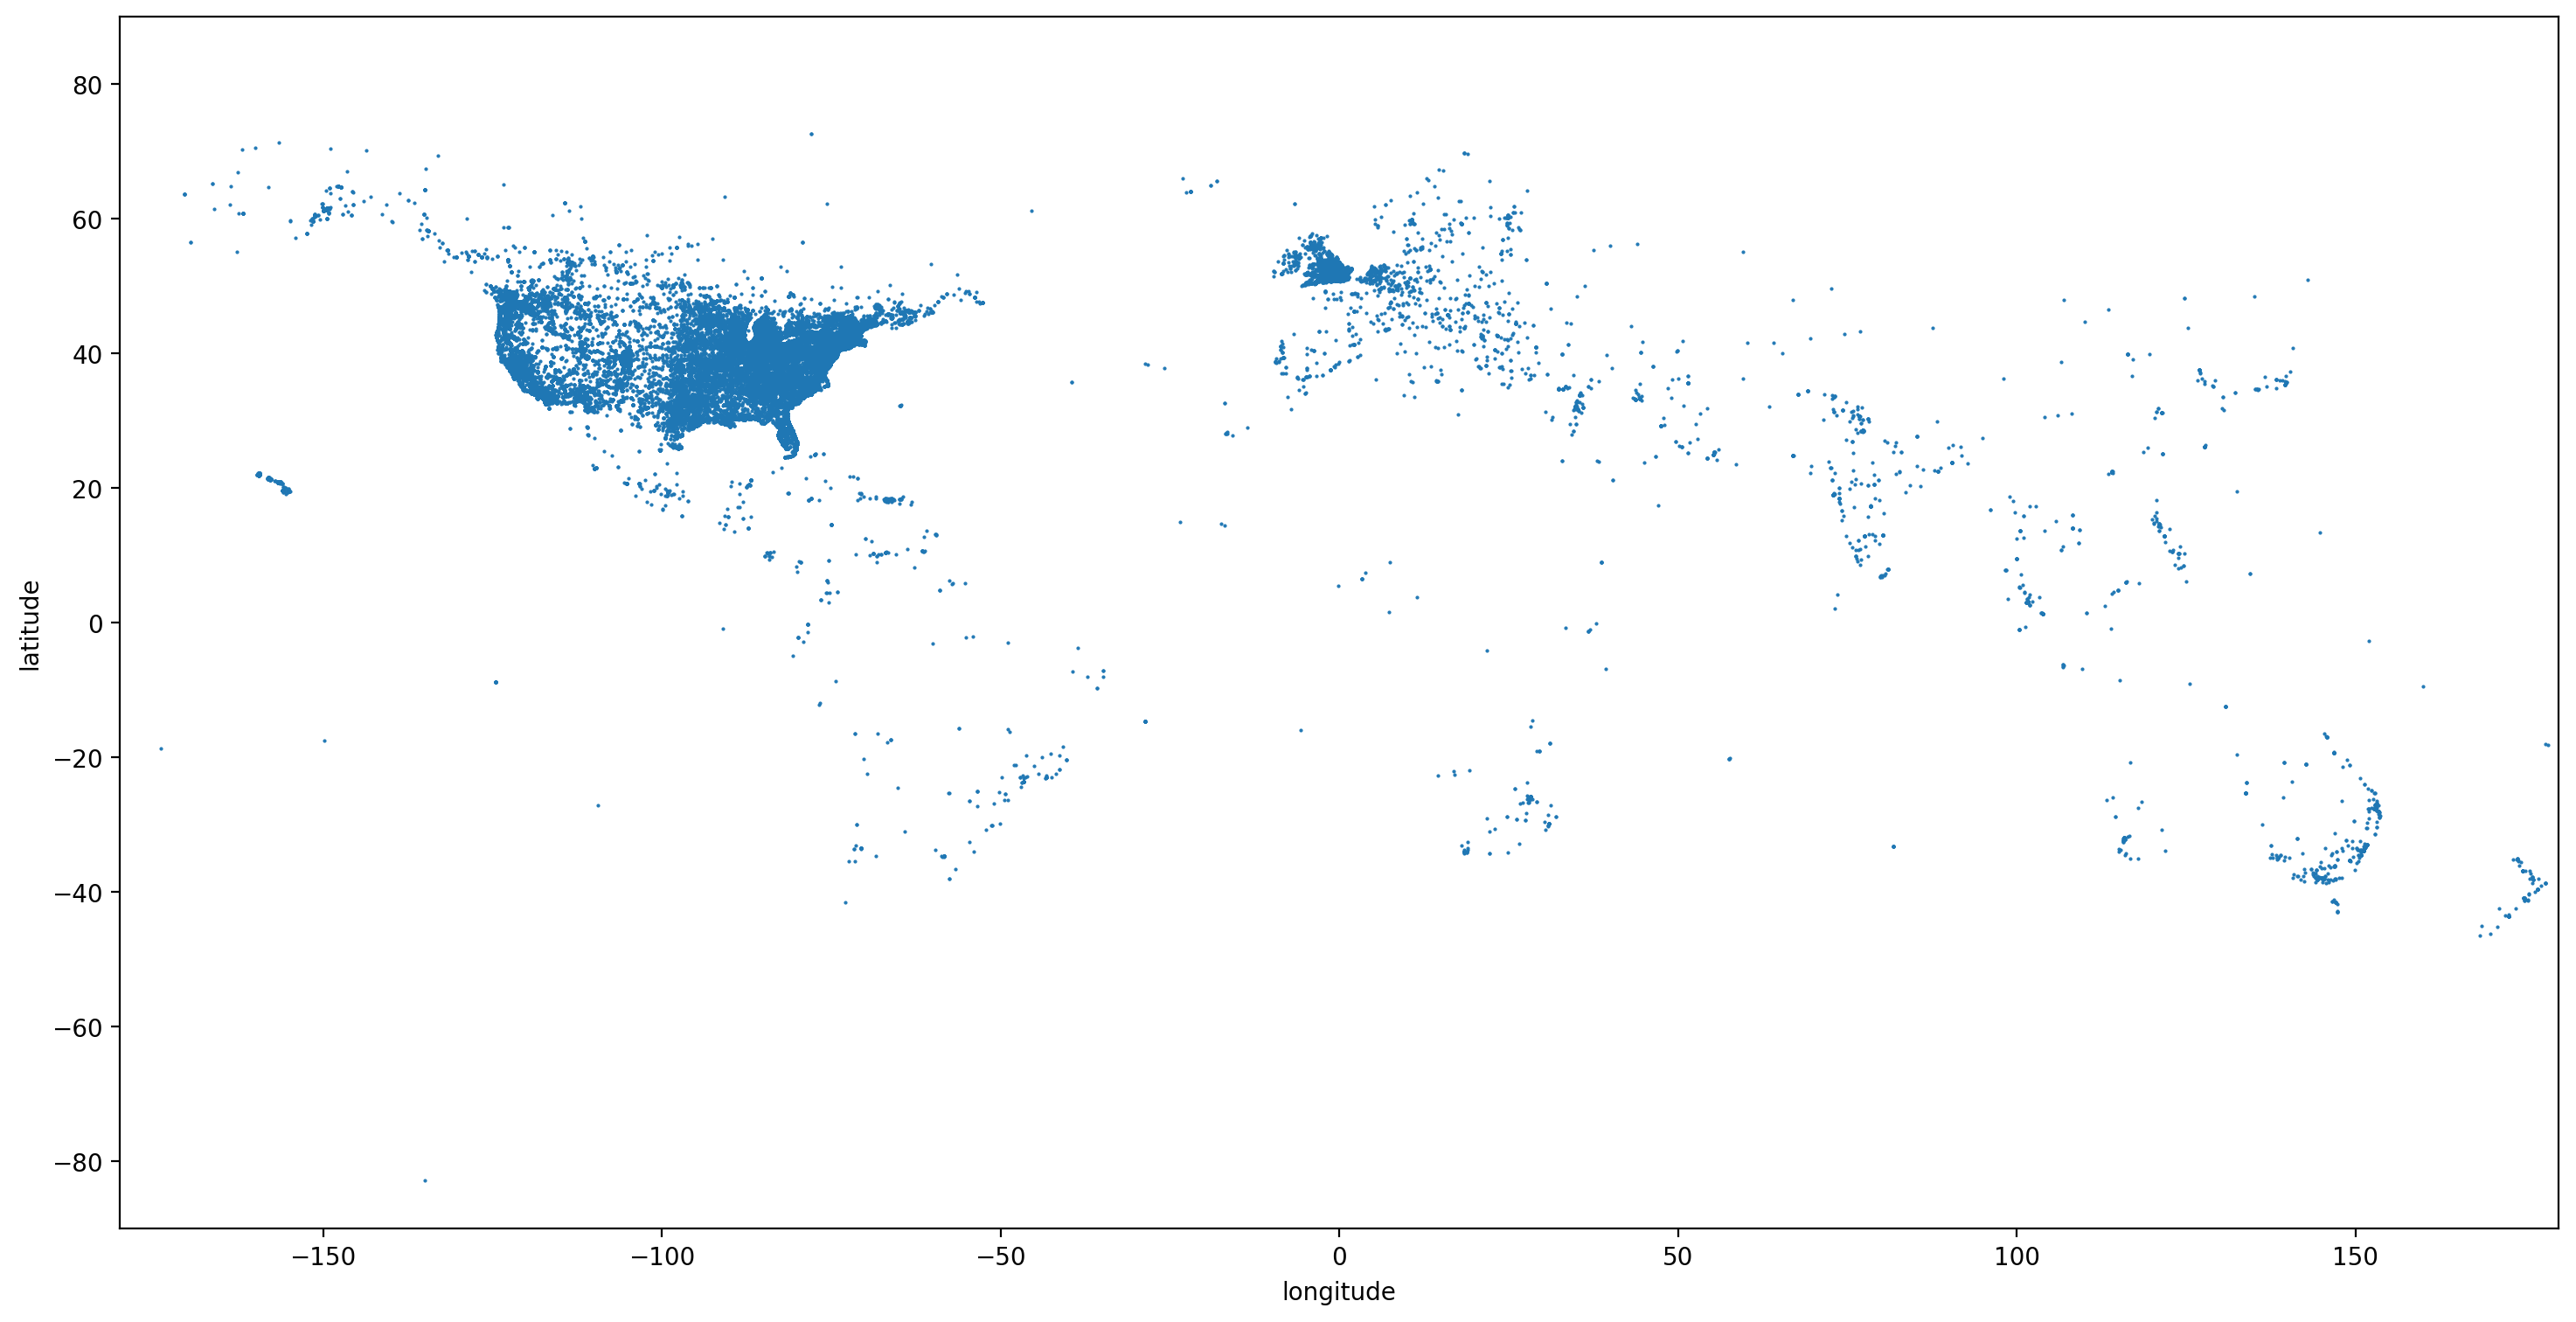

In [3]:
# Show global distribution of encounters
xpoints = ufos['longitude']
ypoints = ufos['latitude']
fig = plt.figure(figsize=(18,9),dpi=200)
plt.scatter(xpoints, ypoints, 0.25)
plt.axis([-180,180,-90, 90])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

<font size=3><b>Figure 2</b></font>

Scatterplot showing the location of every reported encounter.

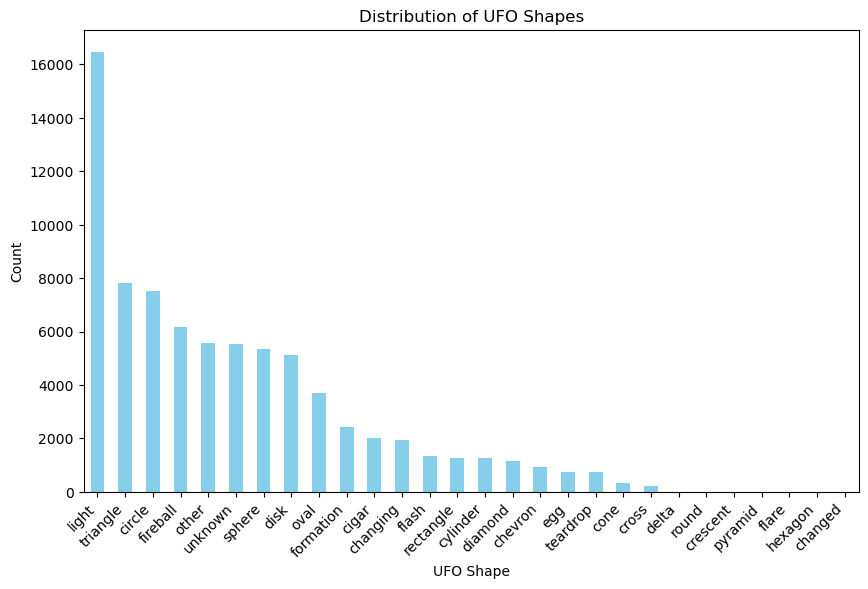

In [4]:
# Show distribution of UFO shapes
import matplotlib.pyplot as plt

ufo_shapes = ufos['ufo_shape']

# Plot the distribution of UFO shapes
plt.figure(figsize=(10, 6))
ufo_shapes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<font size=3><b>Figure 3</b></font>

Bar plot showing the distribution of UFO shapes.

In [5]:
# DecisionTree Classifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


ufo2 = ufos[['encounter_length','ufo_shape']].dropna()
le = preprocessing.LabelEncoder()
for column_name in ufo2.columns:
    if ufo2[column_name].dtype == object:
        ufo2[column_name] = le.fit_transform(ufo2[column_name])
    else:
        pass


train_data = ufo2.loc[:60246]
test_data = pd.DataFrame(data=ufo2.loc[60247:].to_numpy(),columns=ufo2.columns)
X = train_data.drop(['ufo_shape'],axis=1)
Y = train_data['ufo_shape']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
testX = test_data.drop(['ufo_shape'],axis=1)
testY = test_data['ufo_shape']
predY = clf.predict(testX)

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))


Accuracy on test data is 0.22


<font size=3><b>Figure 4</b></font>

Accuracy results from DecisionTreeClassifier

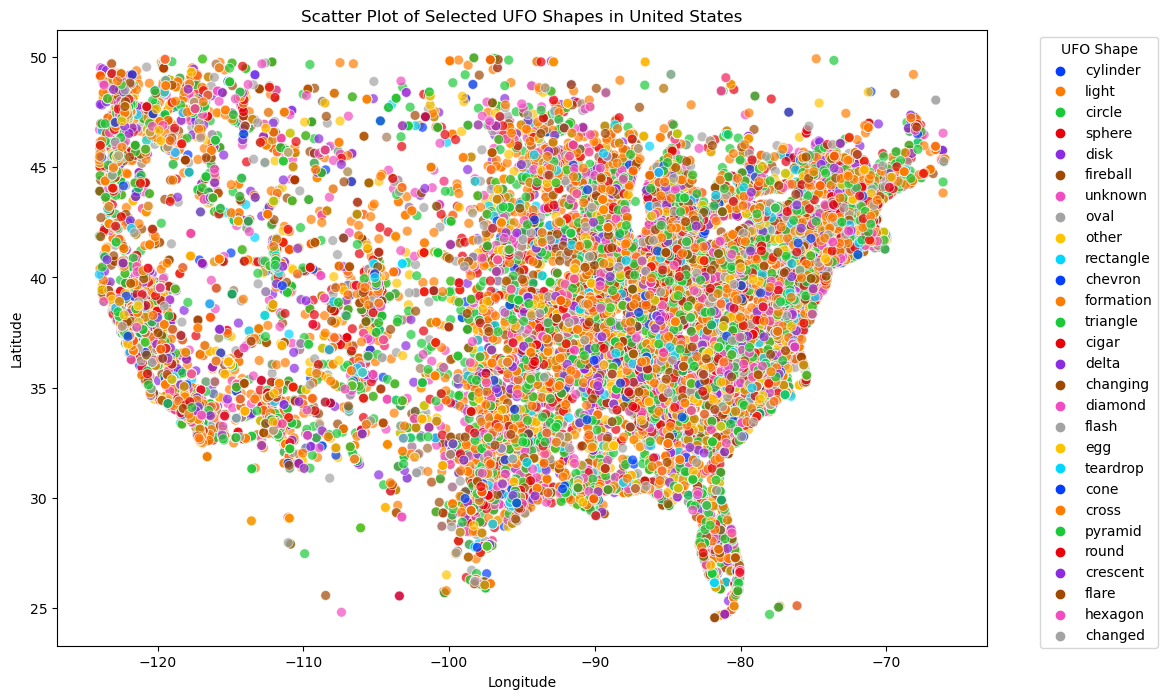

In [6]:
# Scatterplot of UFO shapes in United States
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the latitude and longitude range
latitude_range = (24, 50)
longitude_range = (-124, -66)

selected_ufos = ufos[(ufos['latitude'].between(latitude_range[0], latitude_range[1])) & 
                     (ufos['longitude'].between(longitude_range[0], longitude_range[1]))]

# Set the style and create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='ufo_shape', data=selected_ufos, palette='bright', s=50, alpha=0.7)

plt.title('Scatter Plot of Selected UFO Shapes in United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='UFO Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<font size=3><b>Figure 5</b></font>

Scatterplot showing the distribution of UFO shape in the United states.

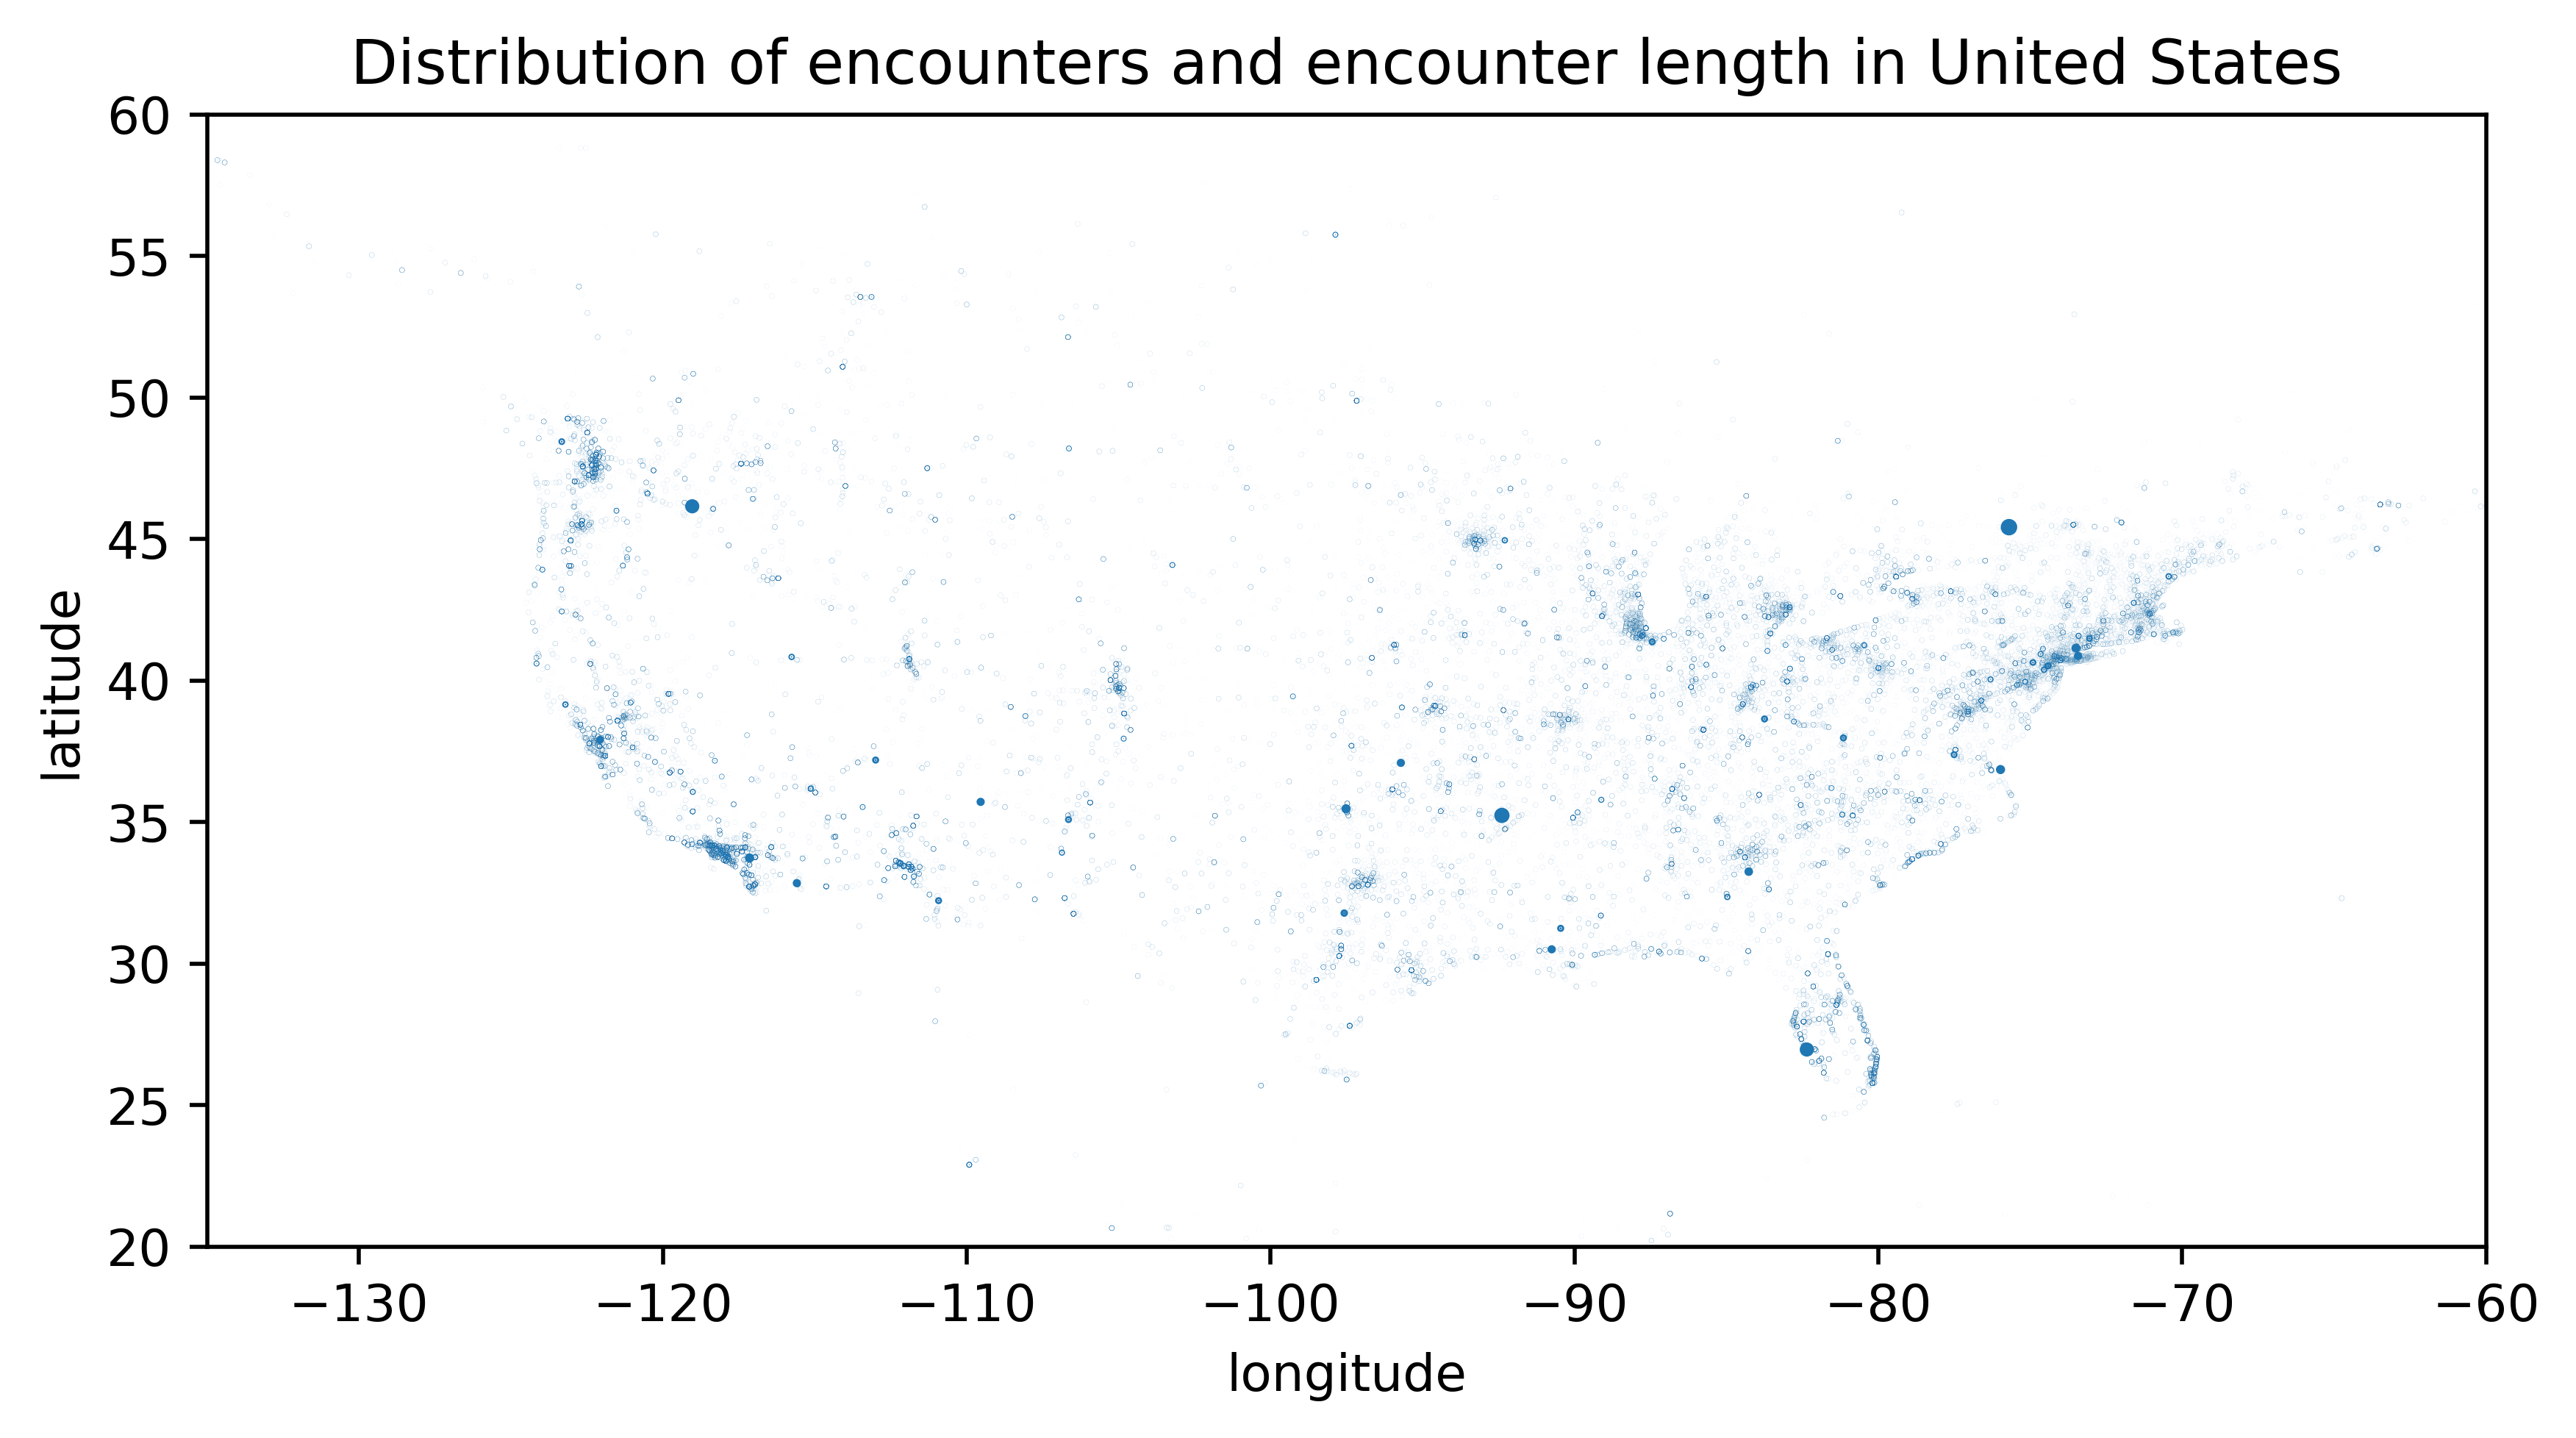

In [7]:
# Distribution of encounters and length in United States
xpoints = ufos['longitude']
ypoints = ufos['latitude']

sizes = preprocessing.normalize([ufos['encounter_length'].fillna(0)])

fig = plt.figure(figsize=(8,4),dpi=500)
plt.scatter(xpoints, ypoints, sizes*10)
plt.axis([-135,-60,20, 60])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Distribution of encounters and encounter length in United States')
plt.show()

<font size=3><b>Figure 6</b></font>

Scatter plot showing the distribution of encounters 

This plot depicts the same graph of locations from before but the scatter size is set by how long the encounter length is; this allows us to not only see common locations, but those of which are visible for longer periods of time. These qualities make the excellent locations for ufo spotting.

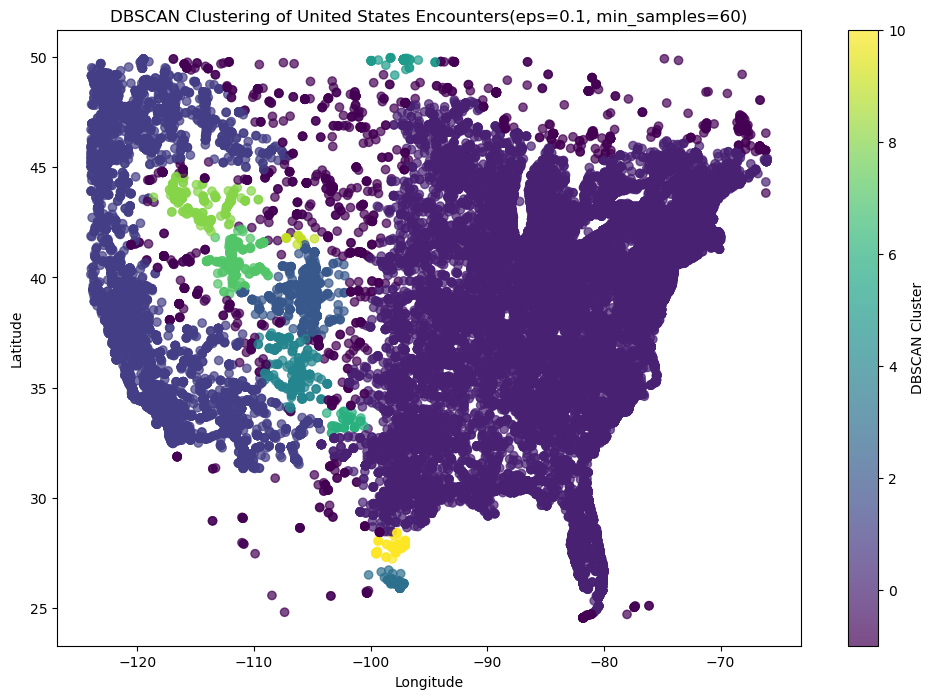

In [8]:
# DBSCAN on UFO encounter locations
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


filtered_ufos = ufos[(ufos['latitude'] >= 24) & (ufos['latitude'] <= 50) & (ufos['longitude'] >= -124) & (ufos['longitude'] <= -66)]
coordinates = filtered_ufos[['latitude', 'longitude']]

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

eps = 0.1
min_samples = 60

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(coordinates_scaled)


# Visualize the clusters on a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_ufos['longitude'], filtered_ufos['latitude'], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title(f'DBSCAN Clustering of United States Encounters(eps={eps}, min_samples={min_samples})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='DBSCAN Cluster')
plt.show()

<font size=3><b>Figure 7</b></font>

Results from running DBSCAN on entries from the United States

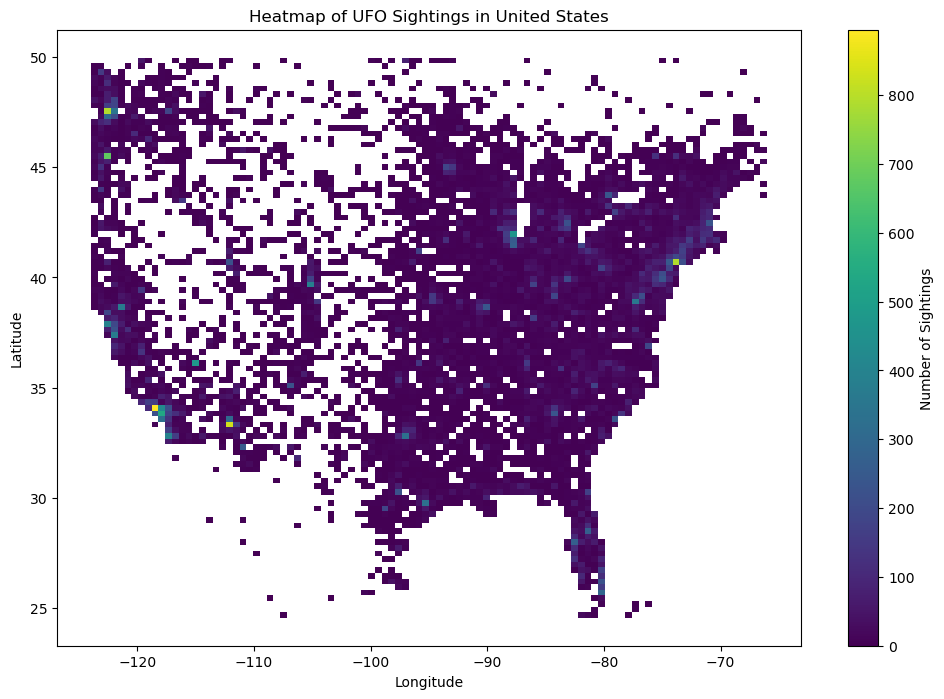

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'latitude' and 'longitude' columns in your DataFrame
filtered_ufos = ufos[(ufos['latitude'] >= 24) & (ufos['latitude'] <= 50) & (ufos['longitude'] >= -124) & (ufos['longitude'] <= -66)]

# Create a 2D histogram (heatmap) using seaborn
plt.figure(figsize=(12, 8))
sns.histplot(filtered_ufos, x='longitude', y='latitude', bins=100, cmap='viridis', cbar=True, cbar_kws={'label': 'Number of Sightings'})
plt.title('Heatmap of UFO Sightings in United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<font size=3><b>Figure 8</b></font>

Heatmap showing the number of UFO encounters by location

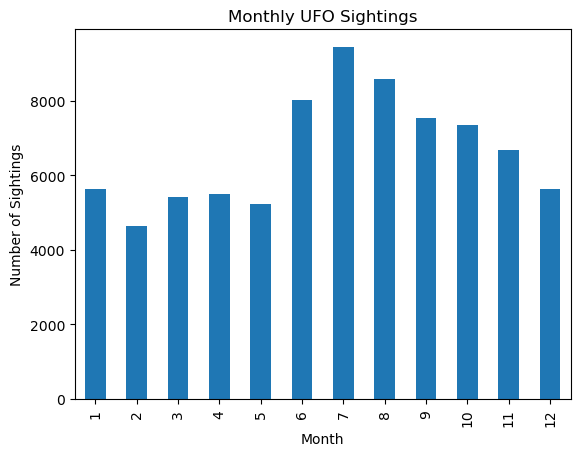

In [10]:
import matplotlib.pyplot as plt

ufos['month'] = ufos['date_time'].dt.month
monthly_counts = ufos.groupby('month').size()
monthly_counts.plot(kind='bar', xlabel='Month', ylabel='Number of Sightings', title='Monthly UFO Sightings')
plt.show()

<font size=3><b>Figure 9</b></font>

Bar plot showing the number of encounter recorded per month.

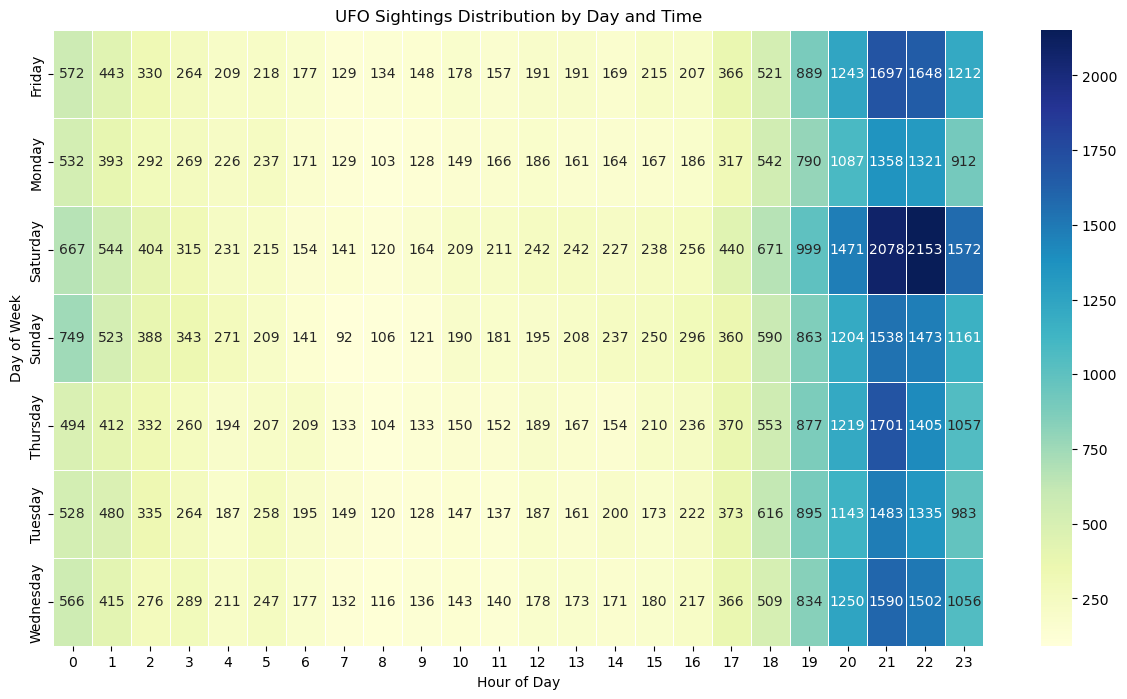

In [11]:
import seaborn as sns

# Assuming 'date_time' is in datetime format
ufos['date_time'] = pd.to_datetime(ufos['date_time'])

# Extract day and hour information
ufos['day'] = ufos['date_time'].dt.day_name()
ufos['hour'] = ufos['date_time'].dt.hour

# Create a pivot table for the heatmap
heatmap_data = ufos.pivot_table(index='day', columns='hour', aggfunc='size', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

plt.title('UFO Sightings Distribution by Day and Time')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()

<font size=3><b>Figure 10</b></font>

Heatmap showing the distribution of sightings by time of day and day of week.

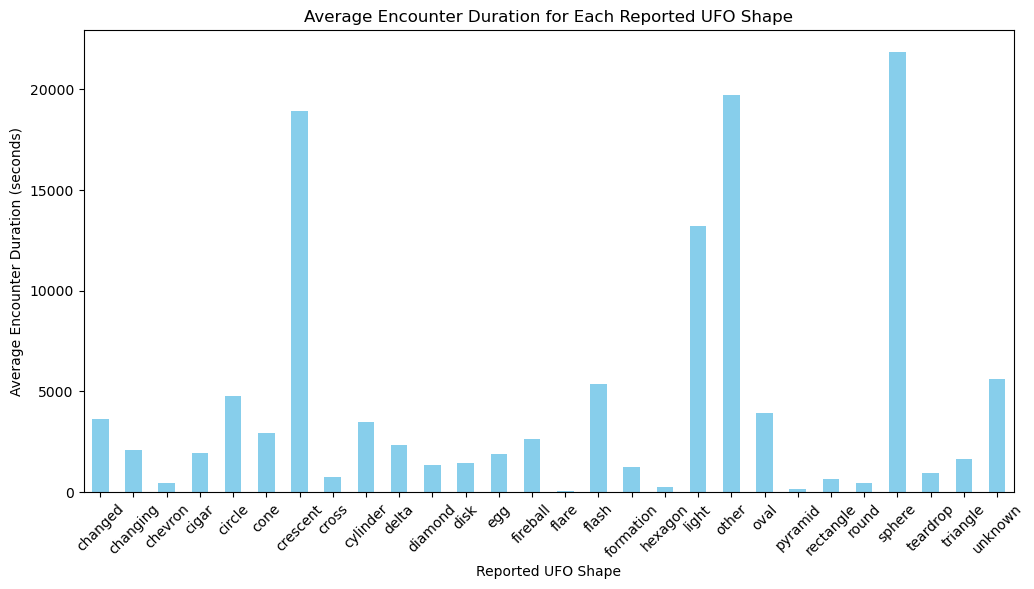

In [12]:
# Bar plot for average encounter duration per UFO shape
ufos = ufos[ufos['described_encounter_length'] != '8 years'].copy() # remove obvious outlier
shape_grouped = ufos.groupby('ufo_shape')['encounter_length'].mean()
plt.figure(figsize=(12, 6))
shape_grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Reported UFO Shape')
plt.ylabel('Average Encounter Duration (seconds)')
plt.title('Average Encounter Duration for Each Reported UFO Shape')
plt.xticks(rotation=45)
plt.show()

<font size=3><b>Figure 11</b></font>

Bar chart showing the average encounter duration by UFO shape

# Conclusion

**Summary of Findings**:

We can find lots of interesting trends in the data. Figure 2 shows that the areas with the most encounters are the United States and the UK. Due to this, as well as our desire to have our own UFO encounters, we chose to have the rest of the algorithms/visualizations focus on the US.

We wanted to know the answer of "How likely are we to see a certain shape of UFO?". Figure 3 helps demonstrate this. We can see that 'light' is the most common UFO shape. 'Light' shaped UFOs make up 21% of the total encounters. However, we also wanted to know, "Could we go to a specific location to see a specific shape of UFO"? In order to answer this we made a decision tree classifier which looked for relations between latitude/longitude and UFO shape. However the best model we could make was only 22% accurate, far lower than anything we could realisticly use. In order to understand what was happeneing with this, we wanted to visualize where these shapes were showing up. Figure 5 shows this, and it is evident that there is no correlation between location and UFO shape.

Since we could not pick a find a relationship between location and shape, we wanted to at least answer "Where can we go to have a greatest chance at seeing a UFO?" In order to answer this we used multiple algorithms/visualizations. Figure 6 shows where locations occured, as well as showing how long they were. Dots that are larger on the graph indicate a longer encounter length. Figure 7 shows the results of running DBSCAN on the encounters in the United States. It helps to demonstrate where encounters are more likely. In order to further show this, we implemented a heatmap with Figure 8. We can see that the Los Angeles are and Philidelphia area have the most encounters.

Since we know *where* we should go to see a UFO, we thought we should know *when* we should go looking. Figure 9 shows the monthly distribution of encounters. We can see that the most encounters occur in July, but June and August are also good months to go looking for a UFO. Figure 10 shows a heatmap of encounters based on the day of the week and the time of day. We can see that Saturday nights from 9:00pm - 11:00pm has the most encounters.

Fihure 11 is used to show how long encounters usually last per shape. It is clear that the 'cone' shaped UFOs have the longest average encounter length by far. 

**Implications:**

Our trends show some possible insights for these encounters. For example, the most common time to see a UFO is Saturday nights from 9:00pm to 11:00pm during the summer months. This could mean that there are more UFOs during these times. However, it could also mean that more people are out and about at these times. During the summer it is warm and people go out more, and it is easier to see more objects in the night sky. The most common UFO shape was light, and it is much easier to see light in a dark sky than during the day. We also see a trend that there are more sightings in more populous areas. The western states are less populous, and these are the areas with less people. The two hotspots in the country are Los Angeles and Philidelphia, two very populated cities. Perhaps people are seeing lights emitted from the cities and reporting them as UFOs.

**Analysis of Algorithms:**

We ran two algorithms that were topics covered by our class: DBSCAN and a decision tree classifier. 

Our decision tree was not very successful. One of our goals was to be able to find a certain shape of UFO based off of a certain location. With an accuracy of 22%, our classifier was unable to consistently do this. At first we were disappointed because we thought the classifier was just bad. However, we were able to see that our data was so spread out and uncorrelated that our decision tree had no chance. To raise its accuracy would just result in extreme overfitting, so we learned that our data is simply too random to predict.

The DBSCAN was much more of a success. We ran the DBSCAN in order to find clusters of UFO sightings. The results were helpful, but they did not reveal many insights into the larger clusters. Figure 7 shows the clsuters that DBSCAN foundAs we can see in Figure 7, there are clusters that take up the eastern half of the United States, most of the west coast, and a few in between. It was helpful in determining where we should *avoid* if we want to find UFOs, but the information on the density of the actual clusters was not very helpful. The clusters were just too large to be actually helpful.

**Limitations:**

This data is reliant on the UFOs that people have seen and reported. Perhaps there are ares that are full of UFOs, but the people are not reporting them. We are also reliant on the validity of all of these reports. We are also depending on reports from a single source, the NUFORC. This is an organization that is based in the United States, so it makes a lot of sense that the US had the most reported encounters. There could be lots of encounters in other countries, but they are not reporting them to the NUFORC. Certain types of encounters may be more likely, consider how many more 'light' shapes there are than every other shape. We are also subject to the classic "correlation does not imply causation", and even though there are lots of encounters in a location historically that does not mean they will be there when we arrive.

**Future work:**

There are a number of things we could do to improve our findings. With more time we would have liked to explore more possible correlations. It would have also been nice to put more work into examining biases and validity of the reports. Another interesting possibility would be to go to areas with more encounters and research what is casuing these places to have so many sightings.

**Concluding thoughts:**

We learned a lot about UFOs throughout this project. We hope that we can use these findings to have our own UFO encounters. We would like to thank the CORGIS Project, NUFORC, and Sigmond Axel for a well maintained dataset, as well as releasing this data for public use.